In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Read excel file

GDP_data=pd.read_excel("../00_Data/Original_data/GDP_data.xlsx")
GDP_data.head()

,Date,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate)
0,2011-01-01,328096.0,5.4
1,2011-02-01,328096.0,5.4
2,2011-03-01,328096.0,5.4
3,2011-04-01,343678.8,3.8
4,2011-05-01,343678.8,3.8


In [33]:
GDP_data.shape

(159, 3)

In [34]:
# There are no missing values.
# However, since we only have monthly data, we'll convert it to daily data.
GDP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Date                                         159 non-null    datetime64[ns]
 1   Gross Domestic Product (GDP)                 159 non-null    float64       
 2   Economic Growth Rate (Real GDP Growth Rate)  159 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.9 KB


In [35]:
GDP_data.describe()

,Date,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate)
count,159,159.000000,159.000000
mean,2017-07-31 23:14:43.018867968,451858.333962,2.586792
min,2011-01-01 00:00:00,328096.000000,-2.600000
25%,2014-04-16 00:00:00,392450.800000,2.300000
50%,2017-08-01 00:00:00,454227.000000,2.800000
75%,2020-11-16 00:00:00,499344.000000,3.200000
max,2024-03-01 00:00:00,587840.000000,6.400000
std,NaN,70183.598052,1.409961


In [36]:
GDP_data.dtypes

Date                                           datetime64[ns]
Gross Domestic Product (GDP)                          float64
Economic Growth Rate (Real GDP Growth Rate)           float64
dtype: object

In [37]:
# Change 'Date' type
GDP_data['Date'] = pd.to_datetime(GDP_data['Date'])

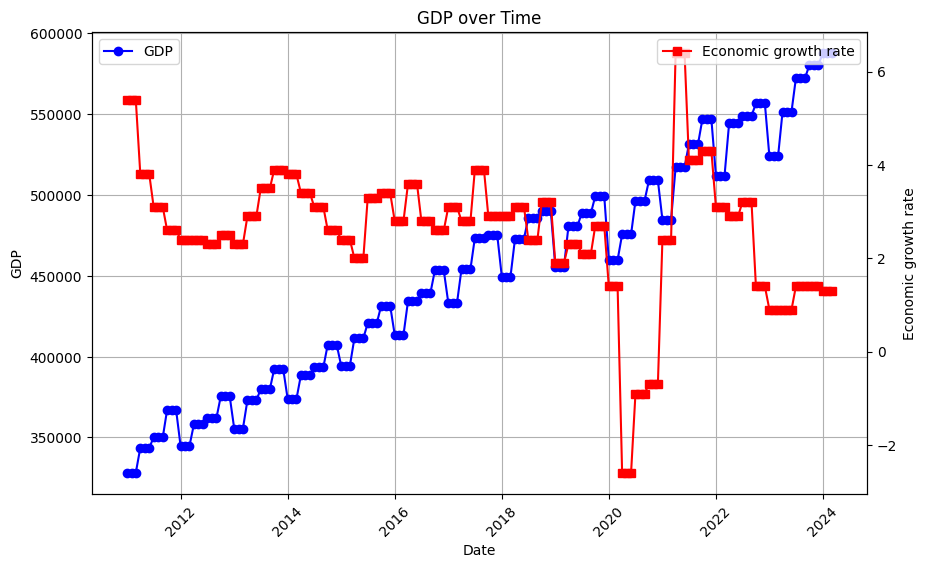

In [39]:
# visualization
plt.figure(figsize=(10, 6))
plt.plot(GDP_data['Date'], GDP_data['Gross Domestic Product (GDP)'], marker='o', color='b', label='GDP')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Creating a secondary y-axis on the right
plt.twinx()
plt.plot(GDP_data['Date'], GDP_data['Economic Growth Rate (Real GDP Growth Rate)'], marker='s', color='r', label='Economic growth rate')
plt.ylabel('Economic growth rate')
plt.legend(loc='upper right')

plt.show()


In [40]:
# It was found that the global economic growth rate sharply declined due to the outbreak of COVID-19.

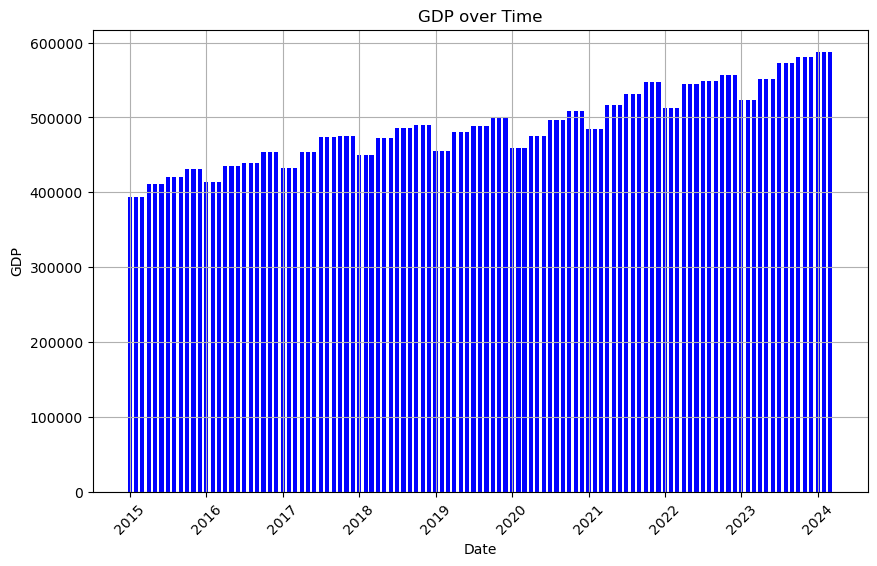

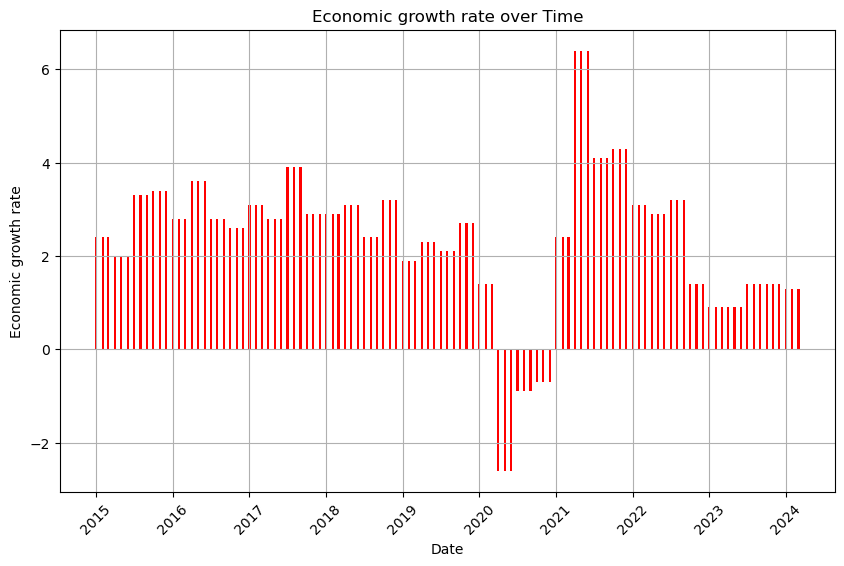

In [ ]:
## Plotting GDP
plt.figure(figsize=(10, 6))
plt.bar(GDP_data['Date'], GDP_data['Gross Domestic Product (GDP)'], color='b', width=20)
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

# Plotting Economic Growth Rate
plt.figure(figsize=(10, 6))
plt.bar(GDP_data['Date'], GDP_data['Economic Growth Rate (Real GDP Growth Rate)'], color='r', width=10)
plt.xlabel('Date')
plt.ylabel('Economic growth rate')
plt.title('Economic growth rate over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [1]:
# GDP shows a similar pattern every year,
# gradually increasing over time.
# Economic growth rate generally increased but experienced a decrease in 2020, followed by a rebound in the next year, 2021.

# GDP 는 매년 비슷한 형태의 그래프
# 늘 조금씩 증가
# 경제성장률은 대체로 증가하였으나 2020년에 감소
# 다음해인 2021년도에 반등

In [43]:
# Set the 'date' column as index
GDP_data.set_index('Date', inplace=True)

# Fill NaN values with the preceding values (1st quarter of 2024)
GDP_data.fillna(method='ffill', inplace=True)

# Reset the index of the dataframe to expand to daily data
GDP_data = GDP_data.resample('D').ffill()

# Reset the index of the dataframe and convert dates to the desired format
GDP_data.reset_index(inplace=True)
GDP_data['Date'] = GDP_data['Date'].dt.strftime('%Y-%m-%d')

# Print the result
GDP_data


C:\Users\jinsung\AppData\Local\Temp\ipykernel_23120\1804963909.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  GDP_data.fillna(method='ffill', inplace=True)


,Date,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate)
0,2011-01-01,328096.0,5.4
1,2011-01-02,328096.0,5.4
2,2011-01-03,328096.0,5.4
3,2011-01-04,328096.0,5.4
4,2011-01-05,328096.0,5.4
...,...,...,...
4804,2024-02-26,587840.0,1.3
4805,2024-02-27,587840.0,1.3
4806,2024-02-28,587840.0,1.3
4807,2024-02-29,587840.0,1.3


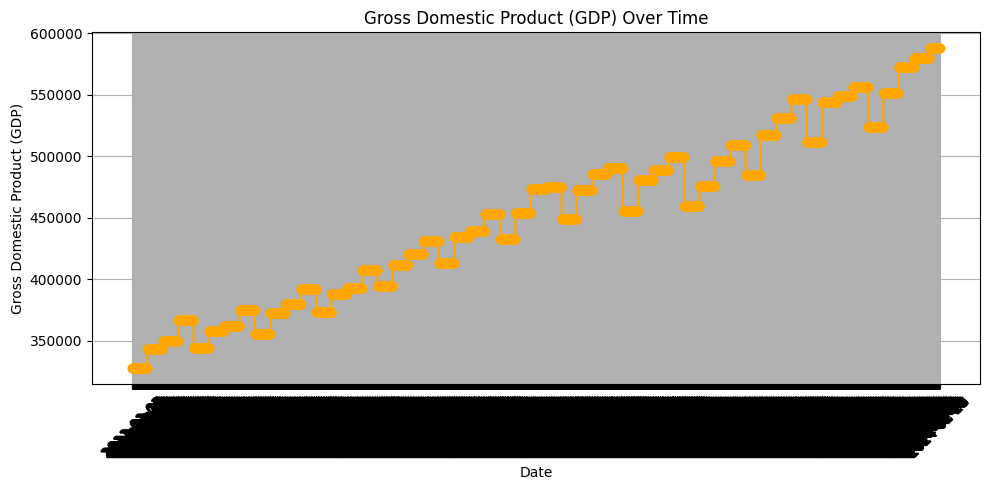

In [47]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(GDP_data['Date'], GDP_data['Gross Domestic Product (GDP)'], marker='o', color='orange')
plt.title('Gross Domestic Product (GDP) Over Time')
plt.xlabel('Date')
plt.ylabel('Gross Domestic Product (GDP)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

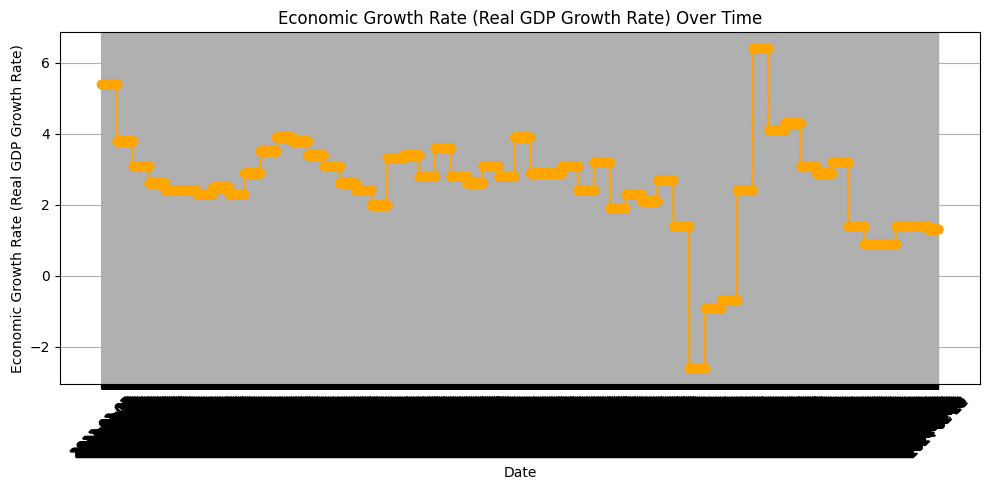

In [46]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(GDP_data['Date'], GDP_data['Economic Growth Rate (Real GDP Growth Rate)'], marker='o', color='orange')
plt.title('Economic Growth Rate (Real GDP Growth Rate) Over Time')
plt.xlabel('Date')
plt.ylabel('Economic Growth Rate (Real GDP Growth Rate)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [45]:
GDP_data.to_excel('../00_Data/Transformed_data/GDP_data_cleaned.xlsx', index=False)